# House Prices

Dataset = "HPSSA Dataset 37 - Media prices paid by ward.xls"

(HPSSA - House Price Statistics for Small Areas)


available from: https://www.ons.gov.uk/peoplepopulationandcommunity/housing/datasets/medianpricepaidbywardhpssadataset37

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

dataset = pd.read_csv('data.csv')


dataset = dataset.replace(':', np.nan)

Convert all columns into numeric for later analysis. Coming in it is assumed as string due to the presence of commas.

In [13]:
quarterly_columns = dataset.columns[4:]
for column in quarterly_columns:
    dataset[column] = dataset[column].str.replace(',','')
    dataset[column] = pd.to_numeric(dataset[column]).astype('float32')

Shortening the names of all time series columns for datetime conversion

In [14]:
conversion_dict = dict(zip(quarterly_columns,[string[-8:] for string in quarterly_columns]))
dataset = dataset.rename(columns = conversion_dict)

In [16]:
dataset.columns = dataset.columns[:4].to_list() + pd.to_datetime(dataset.columns[4:]).to_list()
quarterly_columns = dataset.columns[4:]

In [17]:
# Only in england and wales
print('# authorities : ',len(dataset['Local authority code'].unique()))
print('# wards : ', len(dataset['Ward name'].unique()))

#now, must be some instances of double wards

# authorities :  336
# wards :  7479


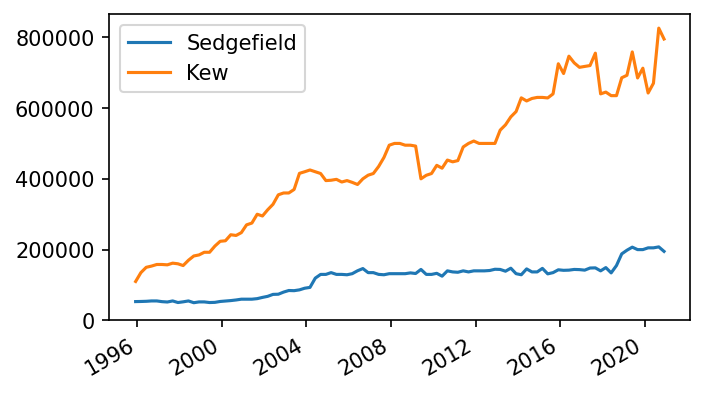

In [18]:
fig,ax = plt.subplots(dpi = 150,figsize = (5,3))
labels = ['Sedgefield','Kew']
dataset[dataset['Ward name'] == 'Sedgefield'][quarterly_columns].T.plot(ax = ax,label = 'Sedgefield',legend = None)
dataset[dataset['Ward code'] == 'E05000524'][quarterly_columns].T.plot(ax = ax,label = 'Kew',legend = None)
ax.set_ylim((0,None))
ax.legend(labels)

In [ ]:
dataset.columns[:4]

In [10]:
dataset['Local authority name'].unique()

array(['Hartlepool', 'Middlesbrough', 'Redcar and Cleveland',
       'Stockton-on-Tees', 'Darlington', 'County Durham',
       'Northumberland', 'Newcastle upon Tyne', 'North Tyneside',
       'South Tyneside', 'Sunderland', 'Gateshead', 'Halton',
       'Warrington', 'Blackburn with Darwen', 'Blackpool',
       'Cheshire East', 'Cheshire West and Chester', 'Allerdale',
       'Barrow-in-Furness', 'Carlisle', 'Copeland', 'Eden',
       'South Lakeland', 'Burnley', 'Chorley', 'Fylde', 'Hyndburn',
       'Lancaster', 'Pendle', 'Preston', 'Ribble Valley', 'Rossendale',
       'South Ribble', 'West Lancashire', 'Wyre', 'Bolton', 'Bury',
       'Manchester', 'Oldham', 'Rochdale', 'Salford', 'Stockport',
       'Tameside', 'Trafford', 'Wigan', 'Knowsley', 'Liverpool',
       'St. Helens', 'Sefton', 'Wirral', 'Kingston upon Hull, City of',
       'East Riding of Yorkshire', 'North East Lincolnshire',
       'North Lincolnshire', 'York', 'Craven', 'Hambleton', 'Harrogate',
       'Richmondshir

In [15]:
dataset[dataset['Ward name'] == 'Kew']

,Local authority code,Local authority name,Ward code,Ward name,Dec 1995,Mar 1996,Jun 1996,Sep 1996,Dec 1996,Mar 1997,...,Sep 2018,Dec 2018,Mar 2019,Jun 2019,Sep 2019,Dec 2019,Mar 2020,Jun 2020,Sep 2020,Dec 2020
1165,E08000014,Sefton,E05000941,Kew,48000.0,49000.0,50000.0,49950.0,50000.0,50000.0,...,160000.0,159950.0,158000.0,158000.0,158000.0,165000.0,175000.0,178975.0,179995.0,171475.0
4787,E09000027,Richmond upon Thames,E05000524,Kew,110000.0,135000.0,150000.0,153500.0,158000.0,158000.0,...,635000.0,685500.0,692500.0,758500.0,685000.0,712500.0,642500.0,670000.0,825700.0,795000.0
